**CARIFet (Cabinet of the Republic of Indonesia Fetcher)**

Import required libs

In [1]:
import pandas as pd # Dataframe
import matplotlib.pyplot as plt # Plotting
from datetime import date # Timestamp

import wikipediaapi as wp # Page Extractor
import wikipedia # Page Search

Read Wikitable as Pandas' Dataframes

In [2]:
# Data source
dfs = pd.read_html("https://id.wikipedia.org/wiki/Kabinet_Indonesia_Maju", attrs={"class": "wikitable"}, header=0)

# Menteri
df1 = dfs[1]
df1.drop(df1[df1['No.'].str.isnumeric() == False].index, inplace=True) # drop row with colspan
df1.drop(["Pejabat","No."], axis=1, inplace=True)
df1.rename(columns={"Pejabat.1": "Pejabat"}, inplace=True, errors="raise")

# Pejabat Setingkat Menteri
df3 = dfs[3]
df3.drop(["Pejabat","No."], axis=1, inplace=True)
df3.drop(df3[df3["Selesai menjabat"] != "Petahana"].index, inplace=True) # drop row with colspan
df3.rename(columns={"Pejabat.1": "Pejabat"}, inplace=True, errors="raise")

# Merge table
df = df1.append(df3, sort=False)

# Reset index
df.reset_index(drop=True, inplace=True)

Show Current Dataframe

In [3]:
df

,Jabatan,Pejabat,Mulai menjabat,Selesai menjabat,Wakil dari Partai
0,"Menteri Koordinator Bidang Politik, Hukum, dan...",Mohammad Mahfud MD,23 Oktober 2019,Petahana,Non Partai
1,Menteri Koordinator Bidang Perekonomian,Airlangga Hartarto,23 Oktober 2019,Petahana,Golkar
2,Menteri Koordinator Bidang Kemaritiman dan Inv...,Luhut Binsar Panjaitan,23 Oktober 2019,Petahana,Golkar
3,Menteri Koordinator Bidang Pembangunan Manusia...,Muhadjir Effendy,23 Oktober 2019,Petahana,Non Partai
4,Menteri Sekretaris Negara,Pratikno,23 Oktober 2019,Petahana,Non Partai
5,Menteri Dalam Negeri,Tito Karnavian,23 Oktober 2019,Petahana,Non Partai
6,Menteri Luar Negeri,Retno Lestari Priansari Marsudi,23 Oktober 2019,Petahana,Non Partai
7,Menteri Pertahanan,Prabowo Subianto,23 Oktober 2019,Petahana,Gerindra
8,Menteri Hukum dan Hak Asasi Manusia,Yasonna Laoly,23 Oktober 2019,Petahana,PDI-P
9,Menteri Keuangan,Sri Mulyani Indrawati,23 Oktober 2019,Petahana,Non Partai


Proporsi partai

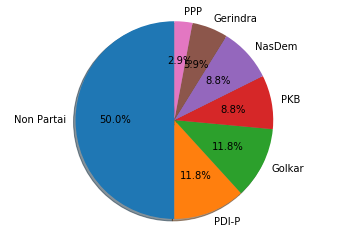

In [4]:
labels = df['Wakil dari Partai'].value_counts().keys().tolist()
counts = df['Wakil dari Partai'].value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Create Page Extractor

In [5]:
# Extractor
wiki_id = wp.Wikipedia(language='id',extract_format=wp.ExtractFormat.WIKI)

Test Extractor

In [6]:
# Page by Minister name
minister_name = df['Pejabat'][0]
minister_name

'Mohammad Mahfud MD'

In [7]:
page_py = wiki_id.page(minister_name)
page_py.exists()

False

The page did not exist because it turns out that the page title in Wikipedia different from minister full name on our dataframe, we have to create a function to search wiki pages if different from our name query.

In [8]:
# Function to search wiki pages if different from name
def wikipedia_search(query, lang="id"):

    items = []
    ret = {"query":query, "itemList":items}
    wikipedia.set_lang(lang)
    wikiterm = wikipedia.search(query)
    
    return wikiterm[0]

We tried it again with previous query

In [9]:
print("Initial term\t\t: ", minister_name)
print("After search term\t: ", wikipedia_search(minister_name))

Initial term		:  Mohammad Mahfud MD
After search term	:  Mahfud MD


Now we test to fetch summary from pages

In [10]:
page_py = wiki_id.page(minister_name)

if(page_py.exists()):
    print(page_py.title)
    print(page_py.summary)
    print(page_py.fullurl)
else:
    page_py = wiki_id.page(wikipedia_search(minister_name))
    print(page_py.title)
    print(page_py.summary)
    print(page_py.fullurl)

Mahfud MD
Prof. Dr. Mohammad Mahfud MD., S.H., S.U., M.I.P. (lahir di Sampang, Madura, Jawa Timur, 13 Mei 1957; umur 62 tahun) yang lebih dikenal dengan nama Mahfud MD adalah seorang politisi, akademisi dan hakim berkebangsaan Indonesia. Dia saat ini menjabat sebagai Menteri Koordinator Bidang Politik, Hukum, dan Keamanan Republik Indonesia pada Kabinet Indonesia Maju periode 2019-2024 Pemerintahan Presiden Joko Widodo-K.H Mar'uf Amin. Mahfud MD dilantik sebagai Menteri Koordinator Bidang Politik, Hukum, dan Keamanan oleh Presiden Joko Widodo pada 23 Oktober 2019.Mahfud MD pernah menjabat sebagai Ketua Mahkamah Konstitusi periode 2008-2013 dan Hakim Konstitusi periode 2008-2013. Sebelumnya ia adalah anggota DPR dan Menteri Pertahanan pada Kabinet Persatuan Nasional. Ia meraih gelar Doktor pada tahun 1993 dari Universitas Gadjah Mada. Sebelum diangkat sebagai Menteri, Ia adalah pengajar dan Guru Besar Hukum Tata Negara di Universitas Islam Indonesia (UII), Yogyakarta. Semasa muda ia jug

Fetch all summary for data on dataframe

In [11]:
def fetch_summary(dataframe, column):
    digest = []

    for i in dataframe[column]:
        page_py = wiki_id.page(i)
        try:
            if(page_py.exists()):
                digest.append(page_py.summary)
            else:
                page_py = wiki_id.page(wikipedia_search(i))
                digest.append(page_py.summary)
        except:
            print("Error")
    
    return digest

In [12]:
df['Summary'] = fetch_summary(df, "Pejabat")

Show Updated Dataframe

In [13]:
df

,Jabatan,Pejabat,Mulai menjabat,Selesai menjabat,Wakil dari Partai,Summary
0,"Menteri Koordinator Bidang Politik, Hukum, dan...",Mohammad Mahfud MD,23 Oktober 2019,Petahana,Non Partai,"Prof. Dr. Mohammad Mahfud MD., S.H., S.U., M.I..."
1,Menteri Koordinator Bidang Perekonomian,Airlangga Hartarto,23 Oktober 2019,Petahana,Golkar,"Dr. (H.C.) Ir. Airlangga Hartarto, M.B.A., M.M..."
2,Menteri Koordinator Bidang Kemaritiman dan Inv...,Luhut Binsar Panjaitan,23 Oktober 2019,Petahana,Golkar,Jenderal TNI (HOR) (Purn.) Luhut Binsar Pandja...
3,Menteri Koordinator Bidang Pembangunan Manusia...,Muhadjir Effendy,23 Oktober 2019,Petahana,Non Partai,"Prof. Dr. Muhajir Effendy, M.A.P. (lahir di Ma..."
4,Menteri Sekretaris Negara,Pratikno,23 Oktober 2019,Petahana,Non Partai,"Prof. Dr. Drs. Pratikno, M.Soc.Sc. (lahir di B..."
5,Menteri Dalam Negeri,Tito Karnavian,23 Oktober 2019,Petahana,Non Partai,Jenderal Polisi (Purn.) Prof. Drs. H. Muhammad...
6,Menteri Luar Negeri,Retno Lestari Priansari Marsudi,23 Oktober 2019,Petahana,Non Partai,"Retno Lestari Priansari Marsudi, L.L.M (lahir ..."
7,Menteri Pertahanan,Prabowo Subianto,23 Oktober 2019,Petahana,Gerindra,Letnan Jenderal TNI (Purn.) H. Prabowo Subiant...
8,Menteri Hukum dan Hak Asasi Manusia,Yasonna Laoly,23 Oktober 2019,Petahana,PDI-P,"Prof. Yasonna Hamonangan Laoly, S.H., M.Sc., P..."
9,Menteri Keuangan,Sri Mulyani Indrawati,23 Oktober 2019,Petahana,Non Partai,"Sri Mulyani Indrawati, S.E., M.Sc., Ph.D (lahi..."


Get page sections from each minister and store it into dataframe

In [14]:
for i in range(df.shape[0]):
    curr_pejabat_name = df['Pejabat'][i]
    page_py = wiki_id.page(curr_pejabat_name)
    print("Getting data for " + curr_pejabat_name + "... " + str(round(i+1/df.shape[0]*100,2)) + "%")
    try:
        if(page_py.exists()):
            for s in page_py.sections:
                df.loc[i, s.title.lower()] = s.text
        else:
            page_py = wiki_id.page(wikipedia_search(curr_pejabat_name))
            for s in page_py.sections:
                df.loc[i, s.title.lower()] = s.text
    except:
        print("Error")

Getting data for Mohammad Mahfud MD... 2.63%
Getting data for Airlangga Hartarto... 3.63%
Getting data for Luhut Binsar Panjaitan... 4.63%
Getting data for Muhadjir Effendy... 5.63%
Getting data for Pratikno... 6.63%
Getting data for Tito Karnavian... 7.63%
Getting data for Retno Lestari Priansari Marsudi... 8.63%
Getting data for Prabowo Subianto... 9.63%
Getting data for Yasonna Laoly... 10.63%
Getting data for Sri Mulyani Indrawati... 11.63%
Getting data for Arifin Tasrif... 12.63%
Getting data for Agus Gumiwang Kartasasmita... 13.63%
Getting data for Agus Suparmanto... 14.63%
Getting data for Syahrul Yasin Limpo... 15.63%
Getting data for Siti Nurbaya Bakar... 16.63%
Getting data for Budi Karya Sumadi... 17.63%
Getting data for Edhy Prabowo... 18.63%
Getting data for Ida Fauziyah... 19.63%
Getting data for Abdul Halim Iskandar... 20.63%
Getting data for Basuki Hadimuljono... 21.63%
Getting data for Terawan Agus Putranto... 22.63%
Getting data for Nadiem Makarim... 23.63%
Getting da

In [15]:
df

,Jabatan,Pejabat,Mulai menjabat,Selesai menjabat,Wakil dari Partai,Summary,keluarga,pendidikan,pekerjaan,jabatan pemerintahan,...,sertifikasi,pengalaman akademis dan organisasi,galeri,bisnis,kepemilikan klub olahraga,daftar pustaka,masa muda dan pendidikan,laporan kekayaan,kasus terkenal,karier swasta
0,"Menteri Koordinator Bidang Politik, Hukum, dan...",Mohammad Mahfud MD,23 Oktober 2019,Petahana,Non Partai,"Prof. Dr. Mohammad Mahfud MD., S.H., S.U., M.I...",Mahfud lahir dari pasangan Mahmodin dan Siti K...,Madrasah Ibtidaiyah di Pondok Pesantren al Mar...,"Dosen Fakultas Hukum, Universitas Islam Indone...",Plt. Staf Ahli dan Deputi Menteri Negara Urusa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Menteri Koordinator Bidang Perekonomian,Airlangga Hartarto,23 Oktober 2019,Petahana,Golkar,"Dr. (H.C.) Ir. Airlangga Hartarto, M.B.A., M.M...",NaN,Airlangga Hartarto adalah lulusan SMA Kolese K...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Menteri Koordinator Bidang Kemaritiman dan Inv...,Luhut Binsar Panjaitan,23 Oktober 2019,Petahana,Golkar,Jenderal TNI (HOR) (Purn.) Luhut Binsar Pandja...,NaN,"Untuk mengejar cita-cita, ia hijrah ke Bandung...",NaN,Duta Besar RI Berkuasa Penuh Untuk Singapura (...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Menteri Koordinator Bidang Pembangunan Manusia...,Muhadjir Effendy,23 Oktober 2019,Petahana,Non Partai,"Prof. Dr. Muhajir Effendy, M.A.P. (lahir di Ma...",NaN,"SD AL-ISLAM, tamat 1968, di Madiun\nPGAN 4 TAH...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Menteri Sekretaris Negara,Pratikno,23 Oktober 2019,Petahana,Non Partai,"Prof. Dr. Drs. Pratikno, M.Soc.Sc. (lahir di B...",NaN,"SMPP Bojonegoro\nS1(Drs.) Ilmu Pemerintahan,Fa...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Menteri Dalam Negeri,Tito Karnavian,23 Oktober 2019,Petahana,Non Partai,Jenderal Polisi (Purn.) Prof. Drs. H. Muhammad...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Menteri Luar Negeri,Retno Lestari Priansari Marsudi,23 Oktober 2019,Petahana,Non Partai,"Retno Lestari Priansari Marsudi, L.L.M (lahir ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Menteri Pertahanan,Prabowo Subianto,23 Oktober 2019,Petahana,Gerindra,Letnan Jenderal TNI (Purn.) H. Prabowo Subiant...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Menteri Hukum dan Hak Asasi Manusia,Yasonna Laoly,23 Oktober 2019,Petahana,PDI-P,"Prof. Yasonna Hamonangan Laoly, S.H., M.Sc., P...",NaN,SR Katolik Sibolga (1959–1965)\nSMP Sibolga (1...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Menteri Keuangan,Sri Mulyani Indrawati,23 Oktober 2019,Petahana,Non Partai,"Sri Mulyani Indrawati, S.E., M.Sc., Ph.D (lahi...",NaN,SMP Negeri 2 Bandar Lampung (1975–1978)\nSMA N...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks all sections and it's availability

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 76 columns):
Jabatan                                                                           38 non-null object
Pejabat                                                                           38 non-null object
Mulai menjabat                                                                    38 non-null object
Selesai menjabat                                                                  38 non-null object
Wakil dari Partai                                                                 34 non-null object
Summary                                                                           38 non-null object
keluarga                                                                          5 non-null object
pendidikan                                                                        16 non-null object
pekerjaan                                                                         1 non-nu

Also try to visualize it

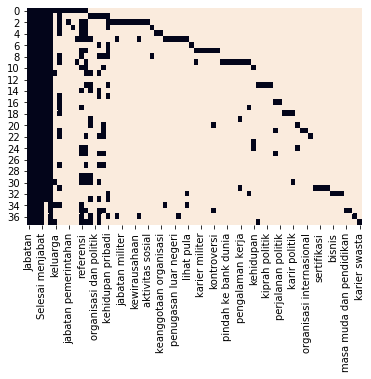

In [17]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

Export to excel

In [18]:
def export_to_excel(df):
    today = date.today()
    df.to_excel("data_menteri_"+str(today)+".xlsx")

export_to_excel(df)